In [1]:
#importing the necessary python libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 

In [27]:
#Loading the dataset
df = pd.read_excel("tata_online_retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#Data Pre-processing and Cleaning

In [28]:
#Shape of the Data 
df.shape

(541909, 8)

In [29]:
#Check for any missing values in the dataset
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [30]:
#Dropping Missing Values
df = df.dropna()

In [31]:
#Re-Checking for any missing values in the dataset
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


#Explarotary Data Analysis

In [7]:
# Get information about the dataset
print(df.info())

# Generate descriptive statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None
            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.0000

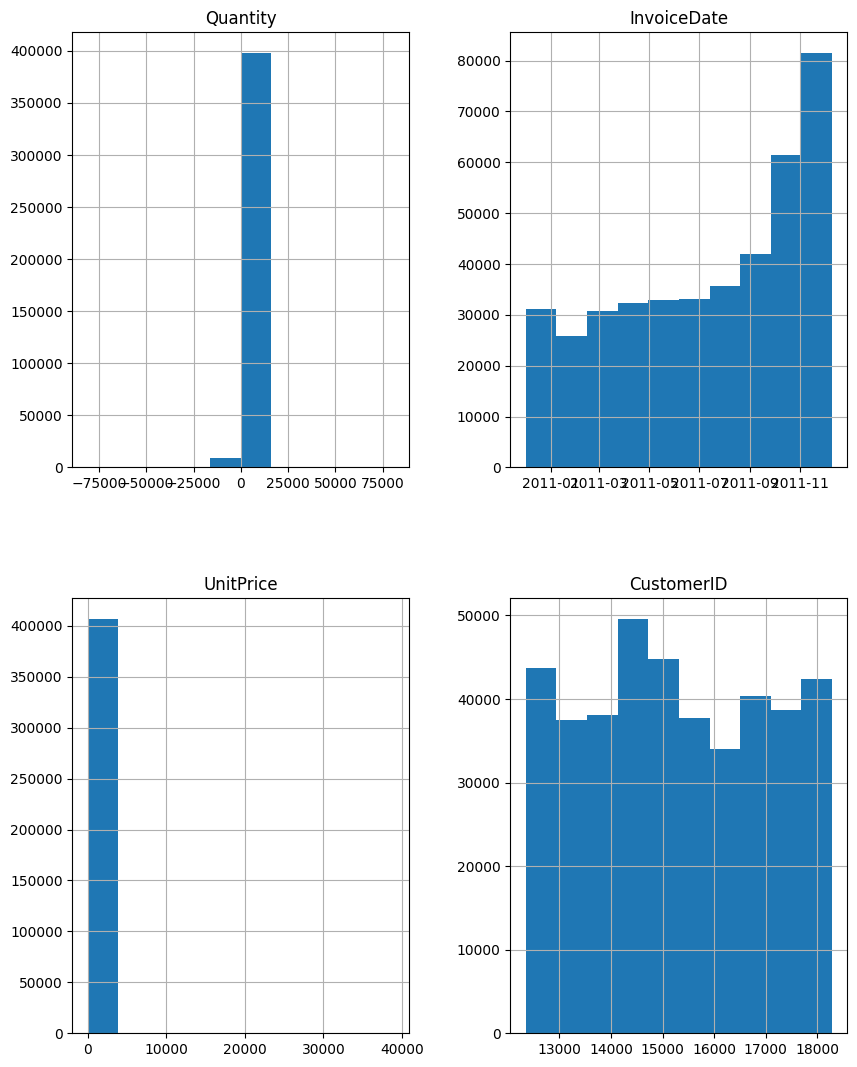

In [8]:
# Visualize the distribution of numerical columns using histograms
df.hist(figsize=(10, 13))
plt.show()

In [9]:
import plotly.express as px

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for year
df['Year'] = df['InvoiceDate'].dt.year

# Group the data by year and count the number of sales
sales_by_year = df.groupby('Year')['InvoiceNo'].count().reset_index()

# Create the line plot using Plotly Express
fig = px.line(sales_by_year, x='Year', y='InvoiceNo', title='Number of Sales over the Period')

# Show the plot
fig.show()


In [10]:
#What are the top-performing products in terms of revenue, and how much revenue do they generate?

import plotly.express as px

top_products = df.groupby('Description').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
fig = px.bar(top_products, x='Quantity', y=top_products.index, orientation='h', 
             title='Top 10 Products by Revenue')
fig.show()


In [11]:
#Which countries are contributing the most to our revenue, and how much revenue do they generate?
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

top_countries = df.groupby('Country').agg({'Revenue': 'sum'}).sort_values(by='Revenue', ascending=False).head(10)
fig = px.bar(top_countries, x='Revenue', y=top_countries.index, orientation='h', 
             title='Top 10 Countries by Revenue')
fig.show()

In [12]:
#What is the overall revenue growth rate for the past year, and what factors have contributed to this growth?
revenue_by_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M')).agg({'Revenue': 'sum'}).reset_index()
fig = px.line(revenue_by_month, x='InvoiceDate', y='Revenue', title='Monthly Revenue Trend')
fig.show()


In [13]:
#What is our customer retention rate, and what strategies can we implement to improve it?
# Group the data by customer ID and count the unique invoice numbers
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate the total number of customers
total_customers = len(repeat_customers)

# Calculate the number of customers who have made repeat purchases
num_repeat_customers = sum(repeat_customers > 1)

# Calculate the customer retention rate
retention_rate = num_repeat_customers / total_customers * 100

print(f"Customer retention rate: {round(retention_rate, 2)}%")


Customer retention rate: 69.97%


#Machine Learning

In [62]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


In [19]:
df.shape

(406829, 10)

In [20]:
#importing the necessary python libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [32]:
# Convert InvoiceDate column to datetime format
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [63]:
# Extract year and month from InvoiceDate column
df['YearMonth'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

In [64]:
# Aggregate data by customer and year-month
customer_data = df.groupby(['CustomerID', 'YearMonth']).agg({'InvoiceNo': 'nunique', 'UnitPrice': 'sum', 'Country': 'first'})
customer_data.columns = ['Frequency', 'MonetaryValue', 'Country']

In [68]:
# Compute recency of customer purchases
max_year_month = df['YearMonth'].max()
customer_data['Recency'] = (pd.to_datetime(max_year_month) - pd.to_datetime(customer_data.index.get_level_values('YearMonth'))) / pd.Timedelta('1 days')

In [66]:
# Convert categorical country data to numerical labels
label_encoder = LabelEncoder()
customer_data['Country'] = label_encoder.fit_transform(customer_data['Country'])

In [67]:
# Create target variable for customer retention prediction
customer_data['NextMonthRetention'] = customer_data.groupby('CustomerID')['Recency'].shift(-1) <= 30

In [38]:
# Drop rows with missing data or negative monetary values
customer_data = customer_data.dropna()
customer_data = customer_data[customer_data['MonetaryValue'] > 0]

In [39]:
# Select features and target variable
features = ['Frequency', 'Recency', 'MonetaryValue', 'Country']
target = 'NextMonthRetention'

In [41]:
#importing necessary ML libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [42]:
X_train, X_test, y_train, y_test = train_test_split(customer_data[features], customer_data[target], test_size=0.2, random_state=42)
# Train random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
#predictions on test data
y_pred = clf.predict(X_test)
#model performance evaluation 
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Retained', 'Retained']))

Accuracy: 0.8643510054844606
              precision    recall  f1-score   support

Not Retained       0.87      0.99      0.93      2347
    Retained       0.64      0.10      0.17       388

    accuracy                           0.86      2735
   macro avg       0.75      0.55      0.55      2735
weighted avg       0.84      0.86      0.82      2735



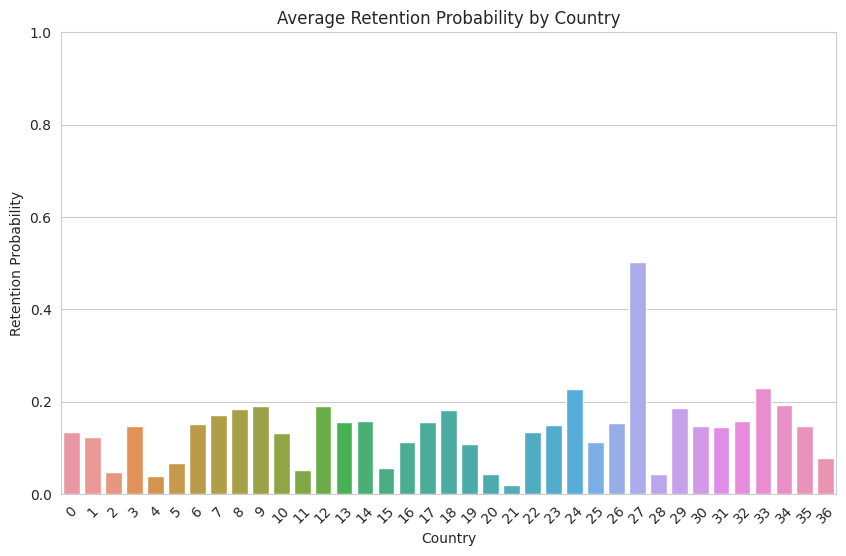

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute predicted retention probabilities for each customer
customer_data['NextMonthRetentionProbability'] = clf.predict_proba(customer_data[features])[:, 1]

# Compute average retention probabilities by country
avg_retention_probs_by_country = customer_data.groupby('Country')['NextMonthRetentionProbability'].mean().reset_index()

# Plot bar chart of average retention probabilities by country
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='NextMonthRetentionProbability', data=avg_retention_probs_by_country)
plt.title('Average Retention Probability by Country')
plt.xlabel('Country')
plt.ylabel('Retention Probability')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

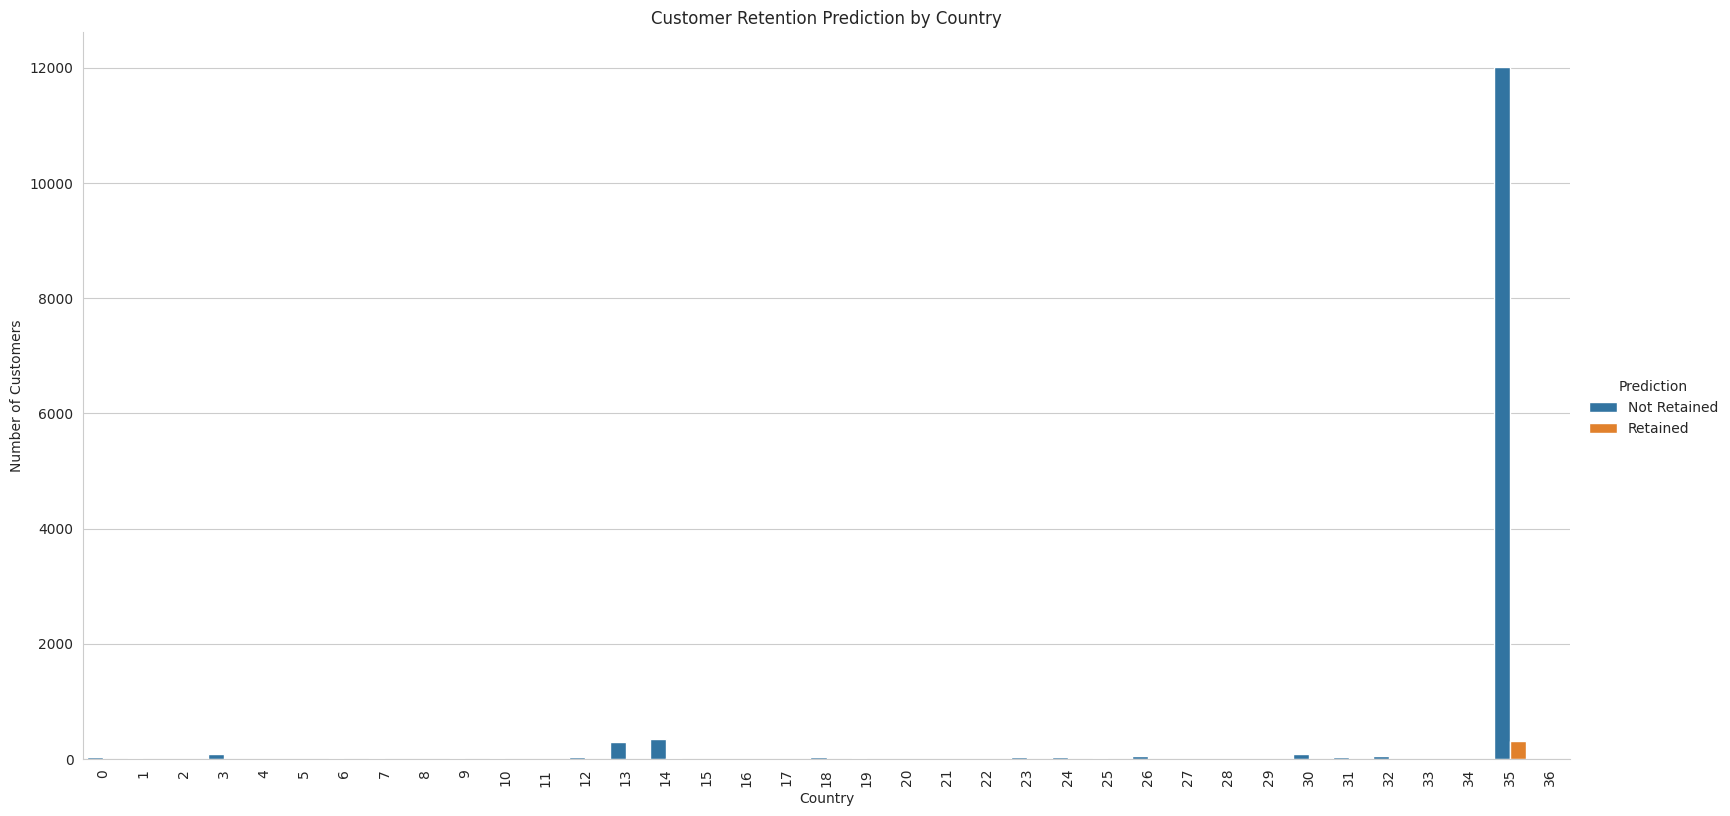

In [46]:
# Visualize model predictions by country
customer_data['Prediction'] = np.where(clf.predict(customer_data[features]), 'Retained', 'Not Retained')
country_counts = customer_data.groupby(['Country', 'Prediction']).size().reset_index(name='Count')
sns.catplot(x='Country', y='Count', hue='Prediction', data=country_counts, kind='bar', height=8, aspect=2)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Customer Retention Prediction by Country')
plt.show()